# **Retrieving data from spatial database infrastructures**

## goals of the tutorial
- geocoding / reverse geocoding
- OGC services
- ESRI ArcGIS RestAPI

**based on the open data of:**
- [national repertoire of territorial data](https://geodati.gov.it/geoportale/)
- [national cartographic portal](http://www.pcn.minambiente.it/mattm/)
- [geoportal of Trentino](http://www.territorio.provincia.tn.it/portal/server.pt/community/portale_geocartografico_trentino/254)
- [italian civil protection department](http://www.protezionecivile.gov.it/)

### requirements
- python knowledge
- geopandas
- gis concepts


**status**

*looking for data*

---

# Geocoding / reverse geocoding

## Setup

In [29]:
try:
    import geopy
except ModuleNotFoundError as e:
    !pip install geopy==2.2.0
    import geopy
if geopy.__version__ != "2.2.0":
    !pip install -U geopy==2.2.0
    import geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
try:
  import mapclassify
except ModuleNotFoundError as e:
  !pip install mapclassify==2.4.3
  import mapclassify

if mapclassify.__version__ != "2.4.3":
  !pip install -U mapclassify==2.4.3

In [31]:
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas==0.10.1
  import geopandas as gpd

if gpd.__version__ != "0.10.1":
  !pip install -U geopandas==0.10.1
  import geopandas as gpd

In [32]:
import geopandas as gpd
from matplotlib import pyplot as plt

**GEOCODING service**

![](https://avatars2.githubusercontent.com/u/1385808?s=400&v=4")

- the geopandas module is based on [geopy](https://geopy.readthedocs.io/en/stable/)
- all the goecoders service are available [here](https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders)


**NOTE**

Attention to the Rate Limit in Pandas<br/>
more info [here](https://geopy.readthedocs.io/en/stable/#usage-with-pandas)

**choose the right service**
<br/><br/>

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/getlonlat.png)

<br/><br/>
visit [getlon.lat](https://getlon.lat/)

## geocoding

In [33]:
cols = ['city']
names = [('Roma'),('Palermo'),('Trento'),('Genova'),('Bari'),('Trieste'),('Napoli'),('Cagliari'),('Messina'),('Lecce')]
cities = gpd.GeoDataFrame(names,columns=cols)

In [34]:
cities

,city
0,Roma
1,Palermo
2,Trento
3,Genova
4,Bari
5,Trieste
6,Napoli
7,Cagliari
8,Messina
9,Lecce


In [35]:
geo_cities = gpd.tools.geocode(cities.city, provider="arcgis")
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [36]:
geo_cities

,geometry,address
0,POINT (12.49565 41.90322),Roma
1,POINT (13.36112 38.12207),Palermo
2,POINT (11.11929 46.07005),Trento
3,POINT (8.93917 44.41048),Genova
4,POINT (16.86666 41.12587),Bari
5,POINT (13.77269 45.65757),Trieste
6,POINT (14.25226 40.84014),Napoli
7,POINT (9.11049 39.21454),Cagliari
8,POINT (15.55309 38.17839),Messina
9,POINT (18.16802 40.35796),Lecce


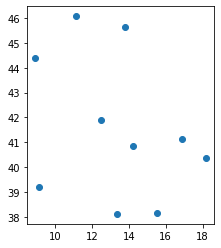

In [37]:
geo_cities.plot()
plt.show()

## reverse geocoding

In [38]:
from geopy.geocoders import Nominatim

In [39]:
geo_cities

,geometry,address
0,POINT (12.49565 41.90322),Roma
1,POINT (13.36112 38.12207),Palermo
2,POINT (11.11929 46.07005),Trento
3,POINT (8.93917 44.41048),Genova
4,POINT (16.86666 41.12587),Bari
5,POINT (13.77269 45.65757),Trieste
6,POINT (14.25226 40.84014),Napoli
7,POINT (9.11049 39.21454),Cagliari
8,POINT (15.55309 38.17839),Messina
9,POINT (18.16802 40.35796),Lecce


In [40]:
point = geo_cities.geometry[2]

In [41]:
point.wkt

'POINT (11.119290000000035 46.07005000000004)'

In [42]:
type(point.x)

float

In [43]:
latlon = str(point.y) + "," + str(point.x)

In [44]:
geolocator = Nominatim(user_agent="Example for the course")

.. but better if use a user agent like

*Mozilla/5.0 (Linux; Android 10) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Mobile Safari/537.36*

Eg

*geolocator = Nominatim(user_agent="Mozilla/5.0 (Linux; Android10) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Mobile Safari/537.36")*



In [45]:
location = geolocator.reverse(latlon)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


the raw method contains all the data available from the geocoder

In [46]:
location.raw

{'place_id': 122464139,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 73293763,
 'lat': '46.070178',
 'lon': '11.119240793834841',
 'display_name': "Giovane Europa, 15, Via Torre Vanga, Bolghera, Piedicastello, Vela, Trento, Territorio Val d'Adige, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38122, Italia",
 'address': {'tourism': 'Giovane Europa',
  'house_number': '15',
  'road': 'Via Torre Vanga',
  'suburb': 'Piedicastello',
  'village': 'Vela',
  'city': 'Trento',
  'municipality': "Territorio Val d'Adige",
  'county': 'Provincia di Trento',
  'ISO3166-2-lvl6': 'IT-TN',
  'state': 'Trentino-Alto Adige/Südtirol',
  'ISO3166-2-lvl4': 'IT-32',
  'postcode': '38122',
  'country': 'Italia',
  'country_code': 'it'},
 'boundingbox': ['46.0700951', '46.0703188', '11.119026', '11.1194422']}

## suggestion for a good geocoding
more details you add and more fortune you have to obtain a good result

In [47]:
q="Via Verdi, 26"

In [48]:
point = gpd.tools.geocode(q, provider="arcgis")

In [49]:
point

,geometry,address
0,POINT (-38.96013 -12.25482),Via Verde


In [50]:
point.explore(marker_kwds={"color": "green", "radius": "10"})

add details like city and State

In [51]:
q="Via Giuseppe Verdi, 26,  Trento, Italia"

In [52]:
point = gpd.tools.geocode(q, provider="arcgis") 

In [53]:
point

,geometry,address
0,POINT (11.11966 46.06665),"Via Giuseppe Verdi 26, 38122, Trento"


In [54]:
point.explore(marker_kwds={"color": "green", "radius": "10"})

Try a different geocoder

In [58]:
point_nominatim = gpd.tools.geocode(q,provider="Nominatim",user_agent="Example for the course")

In [59]:
point_nominatim

,geometry,address
0,POINT (11.11971 46.06641),"Dipartimento di Sociologia e Ricerca Sociale, ..."


In [61]:
q="Via Giuseppe Verdi, 26,  Trento, Italia"

In [62]:
point_nominatim = gpd.tools.geocode(q, provider="Nominatim",user_agent="Example for the course")

In [63]:
point_nominatim

,geometry,address
0,POINT (11.11971 46.06641),"Dipartimento di Sociologia e Ricerca Sociale, ..."


In [64]:
point_nominatim.explore(marker_kwds={"color": "green", "radius": "10"})

calculate the difference between the two points

In [65]:
distance = point.to_crs('epsg:32632').geometry.distance(point_nominatim.geometry.to_crs('epsg:32632')).values[0]

In [66]:
distance

26.522713658370346

**NOTE**:<br/>
A geocoder can offers more as one results<br/>
Eg. Nominatim

In [67]:
more_values = geolocator.geocode(q,exactly_one=False)

In [68]:
more_values

[Location(Dipartimento di Sociologia e Ricerca Sociale, 26, Via Giuseppe Verdi, Bolghera, Centro storico Trento, Trento, Territorio Val d'Adige, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38122, Italia, (46.066413499999996, 11.119705644680646, 0.0)),
 Location(26, Via Giuseppe Verdi, Bolghera, Centro storico Trento, Trento, Territorio Val d'Adige, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38122, Italia, (46.066644, 11.1196548, 0.0)),
 Location(26, Via Giuseppe Verdi, Brancolino, Nogaredo, Comunità della Vallagarina, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38060, Italia, (45.9106572, 11.022791830750524, 0.0)),
 Location(26/c, Via Giuseppe Verdi, Vigne, Arco, Comunità Alto Garda e Ledro, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38062, Italia, (45.9220194, 10.8651408, 0.0)),
 Location(26, Giuseppe-Verdi-Straße - Via Giuseppe Verdi, Musiker-Viertel - Rione Musicisti, Meran - Merano, Burggrafenamt - Burgraviato, Bolzano - Bozen, Trentino-Alto Adige/Südt

In [69]:
more_values[1].raw

{'place_id': 7856565,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 941909198,
 'boundingbox': ['46.066594', '46.066694', '11.1196048', '11.1197048'],
 'lat': '46.066644',
 'lon': '11.1196548',
 'display_name': "26, Via Giuseppe Verdi, Bolghera, Centro storico Trento, Trento, Territorio Val d'Adige, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38122, Italia",
 'class': 'place',
 'type': 'house',
 'importance': 0.6300999999999999}

In [70]:
more_values[1].point

Point(46.066644, 11.1196548, 0.0)

## **Summary**

- geocoding is, first of all, an NLP problem
- geocoding services try to normalize the query by identifying the object you are looking for
- the more information of a geographic hierarchical order the better the geocoder results
- it is difficult to have an always updated address database
- many geocoders, where they do not find the value, return a value inferred from the interpopulation
- accuracy depends on what you are looking for
- a geocoder always tries to give an answer<br/>&nbsp;an excellent geocoder also returns the value of the precision estimate


# OGC Services
![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/ogc_services.png)

---

## Catalog Service for the Web

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/geocatalog_pat.png)

---

https://siat.provincia.tn.it/geonetwork/srv/eng/catalog.search




## Setup
https://geopython.github.io/OWSLib/

In [71]:
try:
    import owslib
except ModuleNotFoundError as e:
    !pip install owslib==0.27.2
    import owslib
    
if owslib.__version__ != "0.27.2":
    !pip install -U owslib==0.27.2
    import owslib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 218 kB 33.1 MB/s 


In [72]:
from owslib.csw import CatalogueServiceWeb

In [73]:
csw = CatalogueServiceWeb("http://geodati.gov.it/RNDT/csw")

In [74]:
csw.service

'CSW'

In [75]:
[op.name for op in csw.operations]

['GetCapabilities',
 'DescribeRecord',
 'GetRecords',
 'GetRecordById',
 'Transaction',
 'Harvest']

In [76]:
from owslib.fes import PropertyIsLike, BBox

fields to query

|                |                            |
|---             |---                         |
|field           | description                |
|*dc:title*      | title of the dataset       |
|*dc:description*| description of the dataset |
|*dc:subject*    | subject of the dataset     |
|*csw:AnyText*   | in all the fields          |

*PropertyIsLike* means that you can use the *LIKE* syntax of SQL

Eg. *%rento* => each word that ends with 'rento'

In [77]:
trento_query = PropertyIsLike('csw:AnyText', 'Trento')

In [78]:
csw.getrecords2(constraints=[trento_query],maxrecords=100)

In [79]:
csw.results

{'matches': 112, 'returned': 100, 'nextrecord': 101}

In [80]:
for rec in csw.records:
  print(rec + " - " + csw.records[rec].title)

p_tn:SECAP_APRIE_Trento - SECAP APRIE Trento
agea:00129:20090724:090446 - Ortofotocarta Trento 2003
agea:00377:20090911:093144 - Ortofotocarta Trento 2008
agea:00128:20090724:085449 - Ortofotocarta Trento 1997
p_TN:377793f1-1094-4e81-810e-403897418b23 - Limite Provinciale della Provincia Autonoma di Trento
ispra_rm:Meta_Geo_SV000056_RN - Trento topografia 25k - View Service
p_TN:09889801-a323-43c9-b336-462c28ef549d - Catasto Sorgenti della Provincia Autonoma di Trento
c_l378:toponomastica - Stradario, civici e toponimi del Comune di Trento
c_l378:ortofoto2009 - Ortofoto 2009
p_TN:71403f02-0b4e-4f02-8475-1321c04e184c - PFM - vocazione alla produzione legnosa dei boschi - (VOCPRODUZIONE)
p_TN:f93c200f-1088-4121-94fc-4e94d1a88c8b - Carta Tecnica Provinciale - CTP 2013
p_TN:2131bcc4-1a2b-46ff-a546-8c22aab0371a - Carta Tecnica Provinciale - CTP 2015
p_TN:c5c29caa-850d-43b5-8a42-4db73cf593f0 - PFM - vocazione naturalistica - (VOCNAT)
p_TN:aec4a171-ad51-49d6-ad9b-42934a2c5d43 - Toponomastica 

```
p_TN:09889801-a323-43c9-b336-462c28ef549d - Catasto Sorgenti della Provincia Autonoma di Trento 
```

water source cadastre of the Autonomous Province of Trento

In [81]:
s="p_TN:8d14de52-8f71-4cf1-9820-ccdc03d405a3" #mountain bike paths

In [82]:
record = csw.records[s]

In [83]:
record.title

'MTB rete dei percorsi in mountainbike'

In [84]:
record.abstract

"Il dataset contiene l'individuazione della rete provinciale dei percorsi in mountainbike  presente sul territorio della Provincia di Trento."

In [85]:
for reference in record.references:
  print(reference['scheme'])
  print(reference['url'])

urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Server
https://idt.provincia.tn.it/idt/vector/p_TN_8d14de52-8f71-4cf1-9820-ccdc03d405a3.zip
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Document
https://geodati.gov.it/geoportalRNDTPA/csw?getxml=%7B2F3325FA-B94E-4B3F-8CD7-A2B46C7BC9AF%7D


In [86]:
mtb_paths = gpd.read_file('https://idt.provincia.tn.it/idt/vector/p_TN_8d14de52-8f71-4cf1-9820-ccdc03d405a3.zip')

In [87]:
mtb_paths.head(5)

,classid,numero,tipo,denominazi,id_ambito,atto,loc_ini,loc_fine,lunghezza,dataagg,objectid,datafine,geometry
0,TUR002_63,865,A,Dosso di Segonzano,3,det. STS n. 45 dd. 15/02/2017,Bedollo,Bedollo,24456.084688,2021-01-01 00:00:00,28255,None,"LINESTRING (675880.012 5118897.999, 675886.315..."
1,TUR002_407,1802,A,Monte Casale,11,det. STS n. 74 dd. 26/02/2021,Comano,Comano,22225.408654,2021-01-01 00:00:00,28256,None,"LINESTRING (646302.434 5099628.802, 646312.012..."
2,TUR002_2,822,A,Bertoldi - Lanzino - Albertini,8,det. STS n. 378 dd. 01/12/2016,Lavarone Bertoldi,Lavarone Bertoldi,3742.833597,2021-01-01 00:00:00,28257,None,"LINESTRING (675380.115 5091046.983, 675377.258..."
3,TUR002_4,907,A,Tour 208,5,det. STS n. 379 dd. 01/12/2016,Pozza di Fassa,Gardeccia,18808.595074,2021-01-01 00:00:00,28258,None,"LINESTRING (707340.204 5148380.666, 707318.778..."
4,TUR002_5,908,None,Tour 210,5,det. STS n. 379 dd. 01/12/2016,Canazei,Val Duron,12973.044585,2021-01-01 00:00:00,28259,None,"LINESTRING (712653.191 5150516.406, 712627.693..."


In [88]:
mtb_paths.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

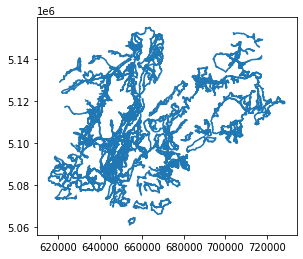

In [89]:
mtb_paths.plot()
plt.show()

we can search by bounding box

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/bbox_klokantech.png)

[https://boundingbox.klokantech.com/](https://boundingbox.klokantech.com/)

In [90]:
csw = CatalogueServiceWeb("http://www.pcn.minambiente.it/geoportal/csw")
csw = CatalogueServiceWeb("http://geodati.gov.it/RNDT/csw")

In [91]:
bbox_query = BBox([11.188617,45.965651,11.376758,46.073412])

In [92]:
csw.getrecords2(constraints=[bbox_query],maxrecords=100)

In [93]:
csw.results

{'matches': 2013, 'returned': 100, 'nextrecord': 101}

In [94]:
for rec in csw.records:
  print(rec + " - " + csw.records[rec].title)

p_TN:bb9e5a5c-36bd-46a0-b7b5-67613b178777 - IFF2007 nel BACINO DEL FIUME BRENTA
c_l378:ortofoto2009 - Ortofoto 2009
c_l378:ct2000 - Carta Tecnica 1:2.000 alta risoluzione
c_l378:4e54a476-38a7-4c75-a692-c5c270b3c091-carta_semplificata - Carta Semplificata
c_l378:prg_vigente - PRG vigente
c_l378:toponomastica - Stradario, civici e toponimi del Comune di Trento
p_TN:c743e9d8-7055-417e-a47b-269460a83d74 - Zone Speciali di Conservazione
p_TN:0e38a95f-807f-433a-be97-8280d81d6e31 - LiDAR DSM Modello Digitale di Superficie -  Campolongo 2011
p_TN:bae2cf41-7d41-4b36-b564-6fd2a6240175 - LiDAR Soleggiamenti DSM  -  Campolongo 2011
p_TN:d59f3fde-0edc-4718-aab5-e00612da95b6 - LiDAR  DTM Modello Digitale del Terreno - Campolongo 2011
p_TN:bf2f0861-d710-4993-b4ab-465d60bda2a2 - LiDAR Campolongo 2011
p_TN:3ac3a9ca-764d-4b31-9939-b6330467a475 - LiDAR Soleggiamenti  DTM - Campolongo 2011
p_TN:013ef530-ee77-49d2-8f95-035b27ab1f0a - Ortofoto Val di Sella 2007 RGB
p_TN:33db32ef-7ce4-43e3-bbf5-11440f4c9757 

In [95]:
s="p_TN:42f109d6-171c-432a-a287-b887e7ccc0d3"

In [96]:
record = csw.records[s]

In [97]:
record.title

'Valanghe - bacini valanghivi'

In [98]:
record.abstract

'Suddivisione del territorio provinciale in zone omogenee dal punto di vista del potenziale pericolo di valanghe'

In [99]:
for reference in record.references:
  print(reference['scheme'])
  print(reference['url'])

urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Server
http://www.territorio.provincia.tn.it/
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Server
https://idt.provincia.tn.it/idt/vector/p_TN_42f109d6-171c-432a-a287-b887e7ccc0d3.zip
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Document
https://geodati.gov.it/geoportalRNDTPA/csw?getxml=%7BF428E20F-B20E-4635-ADC6-0562EEB217B7%7D


## WFS

In [100]:
from owslib.wfs import WebFeatureService

In [101]:
url="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&Service=WFS"


In [102]:
wfs = WebFeatureService(url=url,version="1.1.0") #version can be: 1.0.0, 1.1.0, 2.0.0

In [103]:
wfs.contents

{'ID.ACQUEFISICHE.BACINIIDROGRAFICI.PRINCIPALI': <owslib.feature.wfs110.ContentMetadata at 0x7f5f28d3a5d0>,
 'ID.ACQUEFISICHE.BACINIIDROGRAFICI.SECONDARI': <owslib.feature.wfs110.ContentMetadata at 0x7f5f28d3a290>}

In [104]:
wfs.identification.title

'Bacini idrografici principali e secondari'

In [105]:
[operation.name for operation in wfs.operations]

['GetCapabilities', 'DescribeFeatureType', 'GetFeature']

In [106]:
list(wfs.contents)

['ID.ACQUEFISICHE.BACINIIDROGRAFICI.PRINCIPALI',
 'ID.ACQUEFISICHE.BACINIIDROGRAFICI.SECONDARI']

In [107]:
capabilities = wfs.getcapabilities().read()

In [ ]:
capabilities

```xml
<WFS_Capabilities xmlns="http://www.opengis.net/wfs" xmlns:ogc="http://www.opengis.net/ogc" xmlns:ows="http://www.opengis.net/ows" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.1.0" xmlns:inspire_common="http://inspire.ec.europa.eu/schemas/common/1.0" xmlns:inspire_dls="http://inspire.ec.europa.eu/schemas/inspire_dls/1.0" xsi:schemaLocation="http://www.opengis.net/wfs http://schemas.opengis.net/wfs/1.1.0/wfs.xsd http://inspire.ec.europa.eu/schemas/inspire_dls/1.0 http://inspire.ec.europa.eu/schemas/inspire_dls/1.0/inspire_dls.xsd">
<ows:ServiceIdentification>
<ows:Title>Bacini idrografici principali e secondari</ows:Title>
<ows:Abstract>Sulla base dello strato informativo dei bacini idrografici a scala nazionale 1:250.000, congruente con il reticolo idrografico, sono stati individuati, secondo quanto previsto dal D.Lgs.152/99 e successivamente dalla Direttiva Quadro sulle Acque 2000/60/CE, i bacini e i sottobacini idrografici dei corsi d\'acqua scolanti a mare con superficie maggiore o uguale a 200 Kmq. Risoluzione 1:10000</ows:Abstract>
<ows:ServiceType codeSpace="OGC">OGC WFS</ows:ServiceType>
<ows:ServiceTypeVersion>1.1.0</ows:ServiceTypeVersion>
<ows:Fees>Nessuna condizione applicata</ows:Fees>
<ows:AccessConstraints>Nessuno</ows:AccessConstraints>\n  </ows:ServiceIdentification>\n  <ows:ServiceProvider>
<ows:ProviderName>Geoportale Nazionale - Ministero dell\'Ambiente e della Tutela del Territorio e del Mare</ows:ProviderName>
<ows:ProviderSite xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map" xlink:type="simple" />
<ows:ServiceContact>
<ows:IndividualName>Geoportale Nazionale - Ministero dell\'Ambiente e della Tutela del Territorio e del Mare</ows:IndividualName>
<ows:PositionName>Distributore</ows:PositionName>
<ows:ContactInfo>
  <ows:Phone>
    <ows:Voice>+390657223140</ows:Voice>
    <ows:Facsimile />
  </ows:Phone>
  <ows:Address>
    <ows:DeliveryPoint>Via Cristoforo Colombo, 44</ows:DeliveryPoint>
    <ows:City>Roma</ows:City>
    <ows:AdministrativeArea>RM</ows:AdministrativeArea>
    <ows:PostalCode>00147</ows:PostalCode>
    <ows:Country>Italia</ows:Country>
    <ows:ElectronicMailAddress>pcn@minambiente.it</ows:ElectronicMailAddress>
  </ows:Address>
  <ows:OnlineResource xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map" xlink:type="simple" />
  <ows:HoursOfService />
  <ows:ContactInstructions />  
</ows:ContactInfo>
<ows:Role />

</ows:ServiceContact>\n  </ows:ServiceProvider>\n  <ows:OperationsMetadata>
<ows:Operation name="GetCapabilities">
<ows:DCP>
  <ows:HTTP>
    <ows:Get xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&amp;" xlink:type="simple" />
    <ows:Post xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&amp;" xlink:type="simple" />
  </ows:HTTP>
</ows:DCP>
<ows:Parameter name="service">
  <ows:Value>WFS</ows:Value>
</ows:Parameter>
<ows:Parameter name="AcceptVersions">
  <ows:Value>1.0.0</ows:Value>
  <ows:Value>1.1.0</ows:Value>
</ows:Parameter>
<ows:Parameter name="AcceptFormats">
  <ows:Value>text/xml</ows:Value>
</ows:Parameter>
</ows:Operation>
<ows:Operation name="DescribeFeatureType">
<ows:DCP>
  <ows:HTTP>
    <ows:Get xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&amp;" xlink:type="simple" />
    <ows:Post xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&amp;" xlink:type="simple" />
  </ows:HTTP>
</ows:DCP>
<ows:Parameter name="outputFormat">
  <ows:Value>XMLSCHEMA</ows:Value>
  <ows:Value>text/xml; subtype=gml/2.1.2</ows:Value>
  <ows:Value>text/xml; subtype=gml/3.1.1</ows:Value>
</ows:Parameter>
</ows:Operation>
<ows:Operation name="GetFeature">
<ows:DCP>
  <ows:HTTP>
    <ows:Get xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&amp;" xlink:type="simple" />
    <ows:Post xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&amp;" xlink:type="simple" />
  </ows:HTTP>
</ows:DCP>
<ows:Parameter name="resultType">
  <ows:Value>results</ows:Value>
  <ows:Value>hits</ows:Value>
</ows:Parameter>
<ows:Parameter name="outputFormat">
  <ows:Value>text/xml; subtype=gml/3.1.1</ows:Value>
</ows:Parameter>
</ows:Operation>\n  <ows:ExtendedCapabilities><inspire_dls:ExtendedCapabilities><inspire_common:ResourceLocator xsi:type="inspire_common:resourceLocatorType"><inspire_common:URL>http://wms.pcn.minambiente.it/cgi-bin/mapserv.exe?map=/ms_ogc/wfs/Bacini_idrografici.map</inspire_common:URL><inspire_common:MediaType>application/vnd.ogc.wfs_xml</inspire_common:MediaType></inspire_common:ResourceLocator><inspire_common:ResourceType>service</inspire_common:ResourceType><inspire_common:TemporalReference><inspire_common:DateOfCreation>2011-09-20</inspire_common:DateOfCreation></inspire_common:TemporalReference><inspire_common:TemporalReference><inspire_common:DateOfPublication>2011-09-20</inspire_common:DateOfPublication></inspire_common:TemporalReference><inspire_common:TemporalReference><inspire_common:DateOfLastRevision>2013-01-23</inspire_common:DateOfLastRevision></inspire_common:TemporalReference><inspire_common:Conformity><inspire_common:Specification><inspire_common:Title>REGOLAMENTO (UE) N. 1089/2010 DELLA COMMISSIONE del 23 novembre 2010 recante attuazione della direttiva 2007/2/CE del Parlamento europeo e del Consiglio per quanto riguarda l\'interoperabilit&#224; dei set di dati territoriali e dei servizi di dati territoriali</inspire_common:Title><inspire_common:DateOfPublication>2010-12-08</inspire_common:DateOfPublication><inspire_common:URI>OJ:L:2010:323:0011:0102:IT:PDF</inspire_common:URI><inspire_common:ResourceLocator><inspire_common:URL>http://eur-lex.europa.eu/LexUriServ/LexUriServ.do?uri=OJ:L:2010:323:0011:0102:IT:PDF</inspire_common:URL><inspire_common:MediaType>application/pdf</inspire_common:MediaType></inspire_common:ResourceLocator></inspire_common:Specification><inspire_common:Degree>notConformant</inspire_common:Degree></inspire_common:Conformity><inspire_common:MetadataPointOfContact><inspire_common:OrganisationName>Ministero dell\'Ambiente e della Tutela del Territorio e del Mare - Geoportale Nazionale</inspire_common:OrganisationName><inspire_common:EmailAddress>pcn@minambiente.it</inspire_common:EmailAddress></inspire_common:MetadataPointOfContact><inspire_common:MetadataDate>2011-04-28</inspire_common:MetadataDate><inspire_common:SpatialDataServiceType>Download</inspire_common:SpatialDataServiceType><inspire_common:MandatoryKeyword><inspire_common:KeywordValue>infoFeatureAccessService</inspire_common:KeywordValue></inspire_common:MandatoryKeyword><inspire_common:Keyword xsi:type="inspire_common:inspireTheme_ita"><inspire_common:OriginatingControlledVocabulary><inspire_common:Title>GEMET - INSPIRE themes</inspire_common:Title><inspire_common:DateOfPublication>2008-06-01</inspire_common:DateOfPublication></inspire_common:OriginatingControlledVocabulary><inspire_common:KeywordValue>Idrografia</inspire_common:KeywordValue></inspire_common:Keyword><inspire_common:Keyword><inspire_common:KeywordValue>Acque interne</inspire_common:KeywordValue></inspire_common:Keyword><inspire_common:Keyword><inspire_common:OriginatingControlledVocabulary><inspire_common:Title>GEMET - Concepts, version 2.4</inspire_common:Title><inspire_common:DateOfPublication>2010-01-13</inspire_common:DateOfPublication></inspire_common:OriginatingControlledVocabulary><inspire_common:KeywordValue>Bacino idrografico</inspire_common:KeywordValue></inspire_common:Keyword><inspire_common:SupportedLanguages><inspire_common:DefaultLanguage><inspire_common:Language>ita</inspire_common:Language></inspire_common:DefaultLanguage><inspire_common:SupportedLanguage><inspire_common:Language>ita</inspire_common:Language></inspire_common:SupportedLanguage></inspire_common:SupportedLanguages><inspire_common:ResponseLanguage><inspire_common:Language>ita</inspire_common:Language></inspire_common:ResponseLanguage></inspire_dls:ExtendedCapabilities></ows:ExtendedCapabilities></ows:OperationsMetadata>\n  <FeatureTypeList>
<Operations>
<Operation>Query</Operation>
</Operations>
<FeatureType>
<Name>ID.ACQUEFISICHE.BACINIIDROGRAFICI.PRINCIPALI</Name>
<Title>Bacini idrografici principali</Title>
<Abstract>Sulla base dello strato informativo dei bacini idrografici a scala nazionale 1:250.000, congruente con il reticolo idrografico, sono stati individuati, secondo quanto previsto dal D.Lgs.152/99 e successivamente dalla Direttiva Quadro sulle Acque 2000/60/CE, i bacini idrografici dei corsi d\'acqua scolanti a mare con superficie maggiore o uguale a 200 Kmq. La tabella associata contiene le seguenti informazioni: dgc_codice, informazione non disponibile; id_bacino, identificativo del bacino idrografico; nome_bac, nome del bacino idrografico; nome_corso, nome del corso d\'acqua di riferimento; foglio_igm, foglio IGM di riferimento; ordine, ordine gerarchico; codifica, informazione non disponibile; autorita, autorit&#224; competente del bacino.</Abstract>
<ows:Keywords>
  <ows:Keyword>Idrografia</ows:Keyword>
  <ows:Keyword> Bacino idrografico</ows:Keyword>
</ows:Keywords>
<DefaultSRS>urn:ogc:def:crs:EPSG::4326</DefaultSRS>
<OutputFormats>
  <Format>text/xml; subtype=gml/3.1.1</Format>
</OutputFormats>
<ows:WGS84BoundingBox dimensions="2">
  <ows:LowerCorner>6 34.5</ows:LowerCorner>
  <ows:UpperCorner>19 49</ows:UpperCorner>
</ows:WGS84BoundingBox>
<MetadataURL format="ISO19115:2003" type="text/xml">http://www.pcn.minambiente.it/geoportal/csw?SERVICE=CSW&amp;VERSION=2.0.2&amp;REQUEST=GetRecordById&amp;outputSchema=http%3A%2F%2Fwww.isotc211.org%2F2005%2Fgmd&amp;elementSetName=full&amp;ID=m_amte:8HCH2C:f50c35ae-b0cf-4064-81f7-3556d0973157</MetadataURL>
</FeatureType>
<FeatureType>
<Name>ID.ACQUEFISICHE.BACINIIDROGRAFICI.SECONDARI</Name>
<Title>Bacini idrografici secondari</Title>
<Abstract>Sulla base dello strato informativo dei bacini idrografici a scala nazionale 1:250.000, congruente con il reticolo idrografico, sono stati individuati, secondo quanto previsto dal D.Lgs.152/99 e successivamente dalla Direttiva Quadro sulle Acque 2000/60/CE, i sottobacini relativi ai corsi d\'acqua affluenti del I ordine con superficie maggiore o uguale a 200 Kmq. La tabella associata contiene le seguenti informazioni: dgc_codice, informazione non disponibile; id_bacino, identificativo del bacino idrografico; nome_bac, nome del bacino idrografico; nome_corso, nome del corso d\'acqua di riferimento; foglio_igm, foglio IGM di riferimento; ordine, ordine gerarchico; codifica, informazione non disponibile; autorita, autorit&#224; competente del bacino.</Abstract>
<ows:Keywords>
  <ows:Keyword>Idrografia</ows:Keyword>
  <ows:Keyword> Bacino idrografico</ows:Keyword>
</ows:Keywords>
<DefaultSRS>urn:ogc:def:crs:EPSG::4326</DefaultSRS>
<OutputFormats>
  <Format>text/xml; subtype=gml/3.1.1</Format>
</OutputFormats>
<ows:WGS84BoundingBox dimensions="2">
  <ows:LowerCorner>6 34.5</ows:LowerCorner>
  <ows:UpperCorner>19 49</ows:UpperCorner>
</ows:WGS84BoundingBox>
<MetadataURL format="ISO19115:2003" type="text/xml">http://www.pcn.minambiente.it/geoportal/csw?SERVICE=CSW&amp;VERSION=2.0.2&amp;REQUEST=GetRecordById&amp;outputSchema=http%3A%2F%2Fwww.isotc211.org%2F2005%2Fgmd&amp;elementSetName=full&amp;ID=m_amte:8HCH2C:81df4cb9-67e3-4fd0-abe5-91d1ce3e6e9d</MetadataURL>
</FeatureType>\n  </FeatureTypeList>\n  <ogc:Filter_Capabilities>
<ogc:Spatial_Capabilities>
<ogc:GeometryOperands>
  <ogc:GeometryOperand>gml:Point</ogc:GeometryOperand>
  <ogc:GeometryOperand>gml:LineString</ogc:GeometryOperand>
  <ogc:GeometryOperand>gml:Polygon</ogc:GeometryOperand>
  <ogc:GeometryOperand>gml:Envelope</ogc:GeometryOperand>
</ogc:GeometryOperands>
<ogc:SpatialOperators>
  <ogc:SpatialOperator name="Equals" />
  <ogc:SpatialOperator name="Disjoint" />
  <ogc:SpatialOperator name="Touches" />
  <ogc:SpatialOperator name="Within" />
  <ogc:SpatialOperator name="Overlaps" />
  <ogc:SpatialOperator name="Crosses" />
  <ogc:SpatialOperator name="Intersects" />
  <ogc:SpatialOperator name="Contains" />
  <ogc:SpatialOperator name="DWithin" />
  <ogc:SpatialOperator name="Beyond" />
  <ogc:SpatialOperator name="BBOX" />
</ogc:SpatialOperators>
</ogc:Spatial_Capabilities>
<ogc:Scalar_Capabilities>
<ogc:LogicalOperators />
<ogc:ComparisonOperators>
  <ogc:ComparisonOperator>LessThan</ogc:ComparisonOperator>
  <ogc:ComparisonOperator>GreaterThan</ogc:ComparisonOperator>
  <ogc:ComparisonOperator>LessThanEqualTo</ogc:ComparisonOperator>
  <ogc:ComparisonOperator>GreaterThanEqualTo</ogc:ComparisonOperator>
  <ogc:ComparisonOperator>EqualTo</ogc:ComparisonOperator>
  <ogc:ComparisonOperator>NotEqualTo</ogc:ComparisonOperator>
  <ogc:ComparisonOperator>Like</ogc:ComparisonOperator>
  <ogc:ComparisonOperator>Between</ogc:ComparisonOperator>
</ogc:ComparisonOperators>
</ogc:Scalar_Capabilities>
<ogc:Id_Capabilities>
<ogc:EID />
<ogc:FID />
</ogc:Id_Capabilities>\n  </ogc:Filter_Capabilities>\n</WFS_Capabilities>
```

In [109]:
for layer, meta in wfs.items():
    print(meta.__dict__)
    print(meta.title)
    print(meta.abstract)
    print(meta.crsOptions)
    print(meta.outputFormats)
    

{'auth': <Authentication shared=False username=None password=None cert=None verify=True auth_delegate=None>, 'headers': None, 'id': 'ID.ACQUEFISICHE.BACINIIDROGRAFICI.PRINCIPALI', 'title': 'Bacini idrografici principali', 'abstract': "Sulla base dello strato informativo dei bacini idrografici a scala nazionale 1:250.000, congruente con il reticolo idrografico, sono stati individuati, secondo quanto previsto dal D.Lgs.152/99 e successivamente dalla Direttiva Quadro sulle Acque 2000/60/CE, i bacini idrografici dei corsi d'acqua scolanti a mare con superficie maggiore o uguale a 200 Kmq. La tabella associata contiene le seguenti informazioni: dgc_codice, informazione non disponibile; id_bacino, identificativo del bacino idrografico; nome_bac, nome del bacino idrografico; nome_corso, nome del corso d'acqua di riferimento; foglio_igm, foglio IGM di riferimento; ordine, ordine gerarchico; codifica, informazione non disponibile; autorita, autorità competente del bacino.", 'keywords': ['Idrogr

In [110]:
layer = list(wfs.contents)[0]

In [111]:
layer 

'ID.ACQUEFISICHE.BACINIIDROGRAFICI.PRINCIPALI'

In [112]:
response = wfs.getfeature(typename=layer, bbox=(11.069141,46.038151,11.19823,46.112459),srsname='urn:ogc:def:crs:EPSG::4326')
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [113]:
basins_inbbox = gpd.read_file(response)

ERROR:fiona._env:HTTP error code : 404


In [114]:
basins_inbbox.head()

,gml_id,dgc_codice,id_bacino,nome_bac,nome_corso,foglio_igm,ordine,codifica,autorita,geometry
0,ID.ACQUEFISICHE.BACINIIDROGRAFICI.PRINCIPALI.1,7.0,0,ADIGE,FIUME ADIGE,VENEZIA,1,,ADB ADIGE,"MULTIPOLYGON (((46.53332 10.45039, 46.53329 10..."
1,ID.ACQUEFISICHE.BACINIIDROGRAFICI.PRINCIPALI.7,3.0,0,BRENTA,FIUME BRENTA,VENEZIA,1,,ADB ALTO ADRIATICO,"MULTIPOLYGON (((45.88110 11.80038, 45.87744 11..."


In [115]:
basins_inbbox.explore()

There is a problem with the orientation of the axes<br/>
This is a false problem because the official order of coordinates in EPSG:4326 is latitude and longitude.<br/>
Usually Geopandas corrects it alone.<br/>
In this case we need an operation to change the axes orientation<br/>
This function is supplied in the shapely package.<br/>

In [116]:
import shapely

example with a geometry

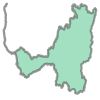

In [117]:
basins_inbbox.geometry[0]

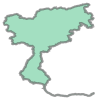

In [118]:
shapely.ops.transform(lambda x, y: (y, x),basins_inbbox.geometry[0])

creation of a function to be use in the *apply* method of pandas

In [119]:
def swapxy(geometry):
  geometry = shapely.ops.transform(lambda x, y: (y, x),geometry)
  return geometry

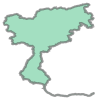

In [120]:
swapxy(basins_inbbox.geometry[0])

In [121]:
basins_inbbox['geometry'] = basins_inbbox['geometry'].apply(lambda geometry: swapxy(geometry))

In [122]:
basins_inbbox.explore()

## Summary WFS
- there are different versions
- from the version 1.1.0 you can have the problem of the axis inverted
- check always the boundary: more is big and more you have to wait.. more you have to wait and more the connection can go in timeout
- if the dataset is available as geojson you can load directly in geopandas
- otherwise you need to download in another format (eg. gml), save it and load as normal file


# OGG API is the future!!!

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/ogc_api.png)

visit 
- [https://ogcapi.ogc.org/](https://ogcapi.ogc.org/)
- [OGC API Features](https://github.com/INSPIRE-MIF/gp-ogc-api-features)
- [learning OGC API features](http://opengeospatial.github.io/e-learning/ogcapi-features/text/basic-main.html)
- [OGC API SensorThings](https://github.com/INSPIRE-MIF/gp-ogc-sensorthings-api)
- [OGC API Records](https://github.com/INSPIRE-MIF/gp-ogc-api-records)

examples
- [https://geoe3platform.eu/geoe3](https://geoe3platform.eu/geoe3)
- [https://geonovum.github.io/wfs3-experiments/docs/Clients.html](https://geonovum.github.io/wfs3-experiments/docs/Clients.html)





# ESRI ArcGIS Online RESTAPI

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/dashboard_covid_protezionecivile.png)

http://opendatadpc.maps.arcgis.com/apps/opsdashboard/index.html#/b0c68bce2cce478eaac82fe38d4138b1

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/esri_dpc.png)

https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services

Documentation of the ESRI API's<br/>https://developers.arcgis.com/rest/

In [123]:
try:
    import shapefile
except ModuleNotFoundError as e:
    !pip install pyshp==2.1.3
    import shapefile

if shapefile.__version__ != "2.1.3":
    !pip install -U pyshp==2.1.3
    import shapefile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 219 kB 33.7 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=40900b608ae32bbb7714bb26f9b49c70557b48a9419d33f3f3a31f04d9d05fa0
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [124]:
import os
os.environ['RESTAPI_USE_ARCPY'] = 'FALSE'

try:
    import restapi
except ModuleNotFoundError as e:
    !pip install bmi-arcgis-restapi==2.2.2
    import restapi

if restapi.__version__ != "2.2.2":
    !pip install -U bmi-arcgis-restapi==2.2.2
    import restapi

import restapi
import requests

session = requests.Session()
client = restapi.RequestClient(session)
restapi.set_request_client(client)

# Disable verification
client.session.verify = False

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 15.3 MB/s 
  Created wheel for bmi-arcgis-restapi: filename=bmi_arcgis_restapi-2.2.2-py3-none-any.whl size=511056 sha256=23aa41a7381ece8e20d8681026374cbae76c60bc496ea7f92e68dfc64c2e8902
  Stored in directory: /root/.cache/pip/wheels/aa/ca/bb/8cde03c3dfd5a1843e14ac4466496f4154b5de5f9eba943993
Successfully built bmi-arcgis-restapi


[bmi-arcgis-restapi](https://github.com/Bolton-and-Menk-GIS/restapi) can use [arcpy](https://desktop.arcgis.com/en/arcmap/10.3/analyze/arcpy/what-is-arcpy-.htm) (proprietary software) o *pyshp* (opensource).

**pyshp** *faster* but with the *basic* functions

In [125]:
rest_url = 'https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services'
ags = restapi.ArcServer(rest_url)

In [126]:
ags.services

[{
   "name": "campi_scuola_2018",
   "type": "FeatureServer",
   "url": "https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services/campi_scuola_2018/FeatureServer"
 }, {
   "name": "CampiScuola_2019",
   "type": "FeatureServer",
   "url": "https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services/CampiScuola_2019/FeatureServer"
 }, {
   "name": "campiscuola2018_def",
   "type": "FeatureServer",
   "url": "https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services/campiscuola2018_def/FeatureServer"
 }, {
   "name": "CapoluoghiProvincia",
   "type": "FeatureServer",
   "url": "https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services/CapoluoghiProvincia/FeatureServer"
 }, {
   "name": "Comuni_Terremotati",
   "type": "FeatureServer",
   "url": "https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services/Comuni_Terremotati/FeatureServer"
 }, {
   "name": "Comuni_terremoto",
   "type": "FeatureServer",
   "url": "https://services6.arcgis.com/L1Sot

In [128]:
# access "CapoluoghiProvincia" service 
ags_service = ags.getService('CapoluoghiProvincia')
ags_service.list_layers()

['CapoluoghiProvincia']

In [129]:
provincial_capitals = ags_service.layer("CapoluoghiProvincia")

In [130]:
provincial_capitals.list_fields()

['FID',
 'OBJECTID',
 'COD_ISTAT',
 'COD_REG',
 'COD_PRO',
 'PRO_COM',
 'LOC2011',
 'LOC',
 'TIPO_LOC',
 'DENOMINAZI',
 'ALTITUDINE',
 'CENTRO_CL',
 'POPRES',
 'MASCHI',
 'FAMIGLIE',
 'ABITAZIONI',
 'EDIFICI',
 'Shape_Leng',
 'Shape_Area',
 'FID_1',
 'COD_RIP',
 'COD_REG_1',
 'COD_PROV',
 'COD_CM',
 'COD_PCM',
 'DEN_PROV',
 'DEN_CM',
 'DEN_PCM',
 'SIGLA',
 'Shape_Le_1',
 'Shape_Ar_1',
 'ORIG_FID']

In [131]:
# export layer to shapefile in WGS 1984 projection
provincial_capitals.export_layer('italian_provincial_capitals.shp', outSR=4326)

Created: "italian_provincial_capitals.shp"


'italian_provincial_capitals.shp'

In [132]:
provincial_capitals

<FeatureLayer: "CapoluoghiProvincia" (id: 0)>

In [133]:
gpd_provincial_capitals = gpd.read_file('italian_provincial_capitals.shp')

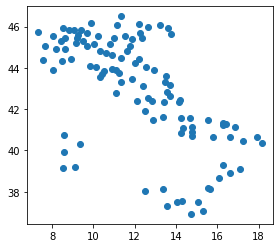

In [134]:
gpd_provincial_capitals.plot()
plt.show()

---
# Exercises
- identify the location of these address with a geocoder
   - Piazza Castello, Udine
   - Piazza Italia, Trento
   - Piazza Foroni, Torino
- find the administrative border of "comunità di valle" (community of valley) of Province Autonomous of Trento
- identify all the rivers inside the smallest community of valley of Trentino
- repeat the same exercise with the layer "Comuni Terremotati" (municipalities affected by earthquake) of the italian Civil Protection by choosing the smallest municipality contained on the layer